In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error,mean_absolute_error, r2_score,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part 3: Logarithmic Regression (Multivariate)

In [3]:
#2 load Dataset
dataset="customer_churn_dataset.csv"
data=pd.read_csv(dataset)
data.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
0,1,56,38,112.48,61.87,8,Two Year,Debit Card,1,0
1,2,69,28,174.51,310.65,6,Two Year,Debit Card,1,0
2,3,46,48,35.11,310.02,1,Month-to-Month,UPI,1,0
3,4,32,38,123.14,434.93,7,One Year,PayPal,0,0
4,5,60,31,95.38,286.54,1,Month-to-Month,Credit Card,0,1


In [4]:
#3 Dataset Information
print("DATASET DESCRIPTION")
print(data.describe()) 
print("--------------")
print("DATASET INFORMATION")
print(data.info())

DATASET DESCRIPTION
        CustomerID           Age  Subscription_Length_Months  Monthly_Bill  \
count  10000.00000  10000.000000                 10000.00000  10000.000000   
mean    5000.50000     46.166100                    29.90170    104.676996   
std     2886.89568     16.421738                    16.99668     54.670610   
min        1.00000     18.000000                     1.00000     10.000000   
25%     2500.75000     32.000000                    15.00000     57.575000   
50%     5000.50000     46.000000                    29.00000    104.540000   
75%     7500.25000     61.000000                    45.00000    151.247500   
max    10000.00000     74.000000                    59.00000    199.980000   

       Total_Usage_GB  Support_Calls  Has_Additional_Services         Churn  
count    10000.000000   10000.000000             10000.000000  10000.000000  
mean       252.475511       4.538300                 0.506500      0.210700  
std        144.003633       2.876658       

In [5]:
#5 Preprocessing Data
# Handling of data is not required since there is no missing data
# Converting categories into numbers
print(data.head())
# encoder = LabelEncoder()
# data["Contract_Type"] = encoder.fit_transform(data["Contract_Type"])
data=pd.get_dummies(data,columns=["Contract_Type","Payment_Method"])
data.head()

   CustomerID  Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0           1   56                          38        112.48           61.87   
1           2   69                          28        174.51          310.65   
2           3   46                          48         35.11          310.02   
3           4   32                          38        123.14          434.93   
4           5   60                          31         95.38          286.54   

   Support_Calls   Contract_Type Payment_Method  Has_Additional_Services  \
0              8        Two Year     Debit Card                        1   
1              6        Two Year     Debit Card                        1   
2              1  Month-to-Month            UPI                        1   
3              7        One Year         PayPal                        0   
4              1  Month-to-Month    Credit Card                        0   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Churn,Contract_Type_Month-to-Month,Contract_Type_One Year,Contract_Type_Two Year,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI
0,1,56,38,112.48,61.87,8,1,0,False,False,True,False,True,False,False
1,2,69,28,174.51,310.65,6,1,0,False,False,True,False,True,False,False
2,3,46,48,35.11,310.02,1,1,0,True,False,False,False,False,False,True
3,4,32,38,123.14,434.93,7,0,0,False,True,False,False,False,True,False
4,5,60,31,95.38,286.54,1,0,1,True,False,False,True,False,False,False


In [6]:
print (data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    10000 non-null  int64  
 1   Age                           10000 non-null  int64  
 2   Subscription_Length_Months    10000 non-null  int64  
 3   Monthly_Bill                  10000 non-null  float64
 4   Total_Usage_GB                10000 non-null  float64
 5   Support_Calls                 10000 non-null  int64  
 6   Has_Additional_Services       10000 non-null  int64  
 7   Churn                         10000 non-null  int64  
 8   Contract_Type_Month-to-Month  10000 non-null  bool   
 9   Contract_Type_One Year        10000 non-null  bool   
 10  Contract_Type_Two Year        10000 non-null  bool   
 11  Payment_Method_Credit Card    10000 non-null  bool   
 12  Payment_Method_Debit Card     10000 non-null  bool   
 13  Pa

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Churn,Contract_Type_Month-to-Month,Contract_Type_One Year,Contract_Type_Two Year,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI
0,1,56,38,112.48,61.87,8,1,0,False,False,True,False,True,False,False
1,2,69,28,174.51,310.65,6,1,0,False,False,True,False,True,False,False
2,3,46,48,35.11,310.02,1,1,0,True,False,False,False,False,False,True
3,4,32,38,123.14,434.93,7,0,0,False,True,False,False,False,True,False
4,5,60,31,95.38,286.54,1,0,1,True,False,False,True,False,False,False


In [7]:
# Correlation Coefficient Matrix
c_r=data.corr()
print(c_r)

                              CustomerID       Age  \
CustomerID                      1.000000 -0.001787   
Age                            -0.001787  1.000000   
Subscription_Length_Months      0.009476 -0.008242   
Monthly_Bill                   -0.005028  0.022199   
Total_Usage_GB                  0.003404  0.001701   
Support_Calls                  -0.012274 -0.013785   
Has_Additional_Services         0.014255  0.000898   
Churn                           0.008814  0.001061   
Contract_Type_Month-to-Month    0.005115  0.011365   
Contract_Type_One Year          0.005952 -0.021790   
Contract_Type_Two Year         -0.011061  0.010367   
Payment_Method_Credit Card     -0.012579  0.013807   
Payment_Method_Debit Card      -0.000360  0.009403   
Payment_Method_PayPal           0.004142 -0.011720   
Payment_Method_UPI              0.008860 -0.011661   

                              Subscription_Length_Months  Monthly_Bill  \
CustomerID                                      0.009476     

In [8]:
#6 Normalize Dataset
min_max_scaler=MinMaxScaler()
normalize_data=pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
normalize_data.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Churn,Contract_Type_Month-to-Month,Contract_Type_One Year,Contract_Type_Two Year,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI
0,0.0000,0.678571,0.637931,0.539425,0.122848,0.888889,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0001,0.910714,0.465517,0.865933,0.620926,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0002,0.500000,0.810345,0.132172,0.619664,0.111111,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0003,0.250000,0.637931,0.595536,0.869745,0.777778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0004,0.750000,0.517241,0.449416,0.572656,0.111111,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
#8 Split Dataset
features=normalize_data.drop(columns=["Churn"])
target=normalize_data["Churn"]

#Partition the data into 80(training)/20(testing)
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(features_train.describe())
print(features_test.describe())

        CustomerID          Age  Subscription_Length_Months  Monthly_Bill  \
count  8000.000000  8000.000000                 8000.000000   8000.000000   
mean      0.501201     0.501353                    0.500011      0.497845   
std       0.288794     0.294155                    0.293717      0.287380   
min       0.000100     0.000000                    0.000000      0.000158   
25%       0.251200     0.250000                    0.241379      0.250553   
50%       0.501400     0.500000                    0.500000      0.498210   
75%       0.750500     0.750000                    0.758621      0.739788   
max       1.000000     1.000000                    1.000000      1.000000   

       Total_Usage_GB  Support_Calls  Has_Additional_Services  \
count     8000.000000    8000.000000              8000.000000   
mean         0.504850       0.503833                 0.508000   
std          0.289405       0.319637                 0.499967   
min          0.000000       0.000000          

In [10]:
print(target_train.describe())
print(target_test.describe())

count    8000.000000
mean        0.211875
std         0.408662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64
count    2000.000000
mean        0.206000
std         0.404532
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64


In [11]:
#4,9 Training the model using logarithmic regression
features_train_log=np.log1p(features_train)
features_test_log=np.log1p(features_test)

model_logarithmic=LinearRegression()
model_logarithmic.fit(features_train_log,target_train)

# Logistic Regression
model_logistic=LogisticRegression()
model_logistic.fit(features_train,target_train)


LogisticRegression()

In [12]:
#10 Predict the output for test data-Logarithmic
target_prediction_logarithmic=model_logarithmic.predict(features_test_log)
print(target_prediction_logarithmic)
target_prediction_logarithmic_round=np.round(target_prediction_logarithmic)
print(target_prediction_logarithmic_round)

#10 Predict the output for test data-Logistic
target_prediction_logistic=model_logistic.predict(features_test)
print(target_prediction_logistic)
target_prediction_logistic_round=np.round(target_prediction_logistic)
print(target_prediction_logistic_round)

[0.19921875 0.20703125 0.23046875 ... 0.23046875 0.1796875  0.24609375]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
#9 Confusion Matrix-Logarithmic
#Not Working with regression model
c_m_logarithmic=confusion_matrix(target_test,target_prediction_logarithmic_round)
accuracy_logarithmic=accuracy_score(target_test,target_prediction_logarithmic_round)
print ("Confusion Matrix (logarithmic): \n",c_m_logarithmic)
print ("Accuracy (logarithmic): ",accuracy_logarithmic)

#9 Confusion Matrix-Logistic
#Not Working with regression model
c_m_logistic=confusion_matrix(target_test,target_prediction_logistic)
accuracy_logistic=accuracy_score(target_test,target_prediction_logistic)
print ("Confusion Matrix (logistic): \n",c_m_logistic)
print ("Accuracy (logistic): ",accuracy_logistic)


Confusion Matrix (logarithmic): 
 [[1588    0]
 [ 412    0]]
Accuracy (logarithmic):  0.794
Confusion Matrix (logistic): 
 [[1588    0]
 [ 412    0]]
Accuracy (logistic):  0.794


In [14]:
#11 Evaluating the Model-logarithmic
#Squared Error
mse_logarithmic=mean_squared_error(target_test,target_prediction_logarithmic)
print("mean squared error (logarithmic): ",mse_logarithmic)

#Absolute Error
mae_logarithmic=mean_absolute_error(target_test,target_prediction_logarithmic)
print("mean absolute error (logarithmic): ",mae_logarithmic)

#R2 Score
r2_logarithmic=r2_score(target_test,target_prediction_logarithmic)
print("r2score (logarithmic): ",r2_logarithmic)

#11 Evaluating the Model-logistic
#Squared Error
mse_logistic=mean_squared_error(target_test,target_prediction_logistic)
print("mean squared error (logistic): ",mse_logistic)

#Absolute Error
mae_logistic=mean_absolute_error(target_test,target_prediction_logistic)
print("mean absolute error (logistic): ",mae_logistic)

#R2 Score
r2_logistic=r2_score(target_test,target_prediction_logistic)
print("r2score (logistic): ",r2_logistic)

mean squared error (logarithmic):  0.16465904998779296
mean absolute error (logarithmic):  0.327693359375
r2score (logarithmic):  -0.006694932795682229
mean squared error (logistic):  0.206
mean absolute error (logistic):  0.206
r2score (logistic):  -0.2594458438287155


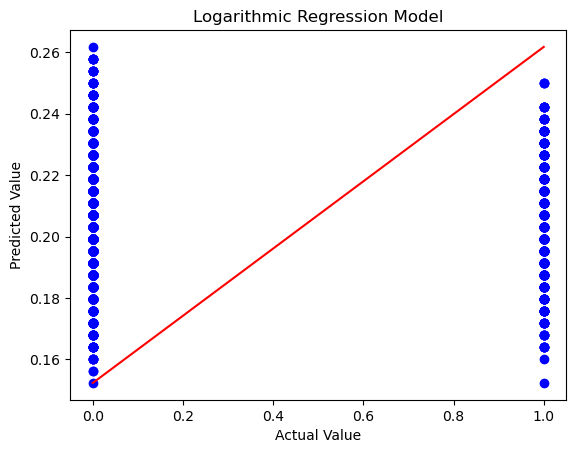

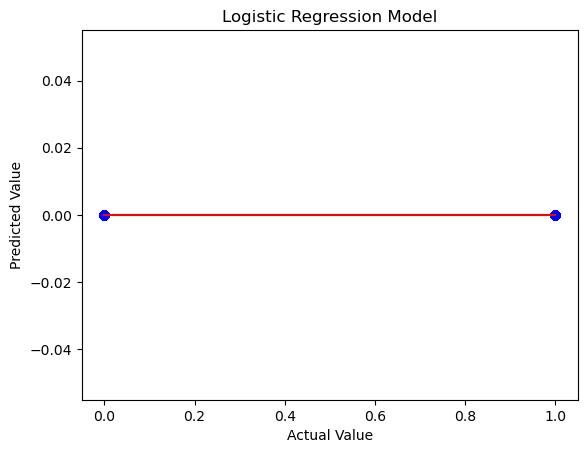

In [15]:
#12 Graphs
#Generating Scatter Plot-logarithmic
plt.figure()
plt.scatter(target_test,target_prediction_logarithmic,color="blue",label="Actual VS Predicted (Logarithmic)")
plt.plot([target_test.min(),target_test.max()],[target_prediction_logarithmic.min(),target_prediction_logarithmic.max()],color="red")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Logarithmic Regression Model")
plt.show()

#Generating Scatter Plot-logistic
plt.figure()
plt.scatter(target_test,target_prediction_logistic,color="blue",label="Actual VS Predicted (Logistic)")
plt.plot([target_test.min(),target_test.max()],[target_prediction_logistic.min(),target_prediction_logistic.max()],color="red")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Logistic Regression Model")
plt.show()

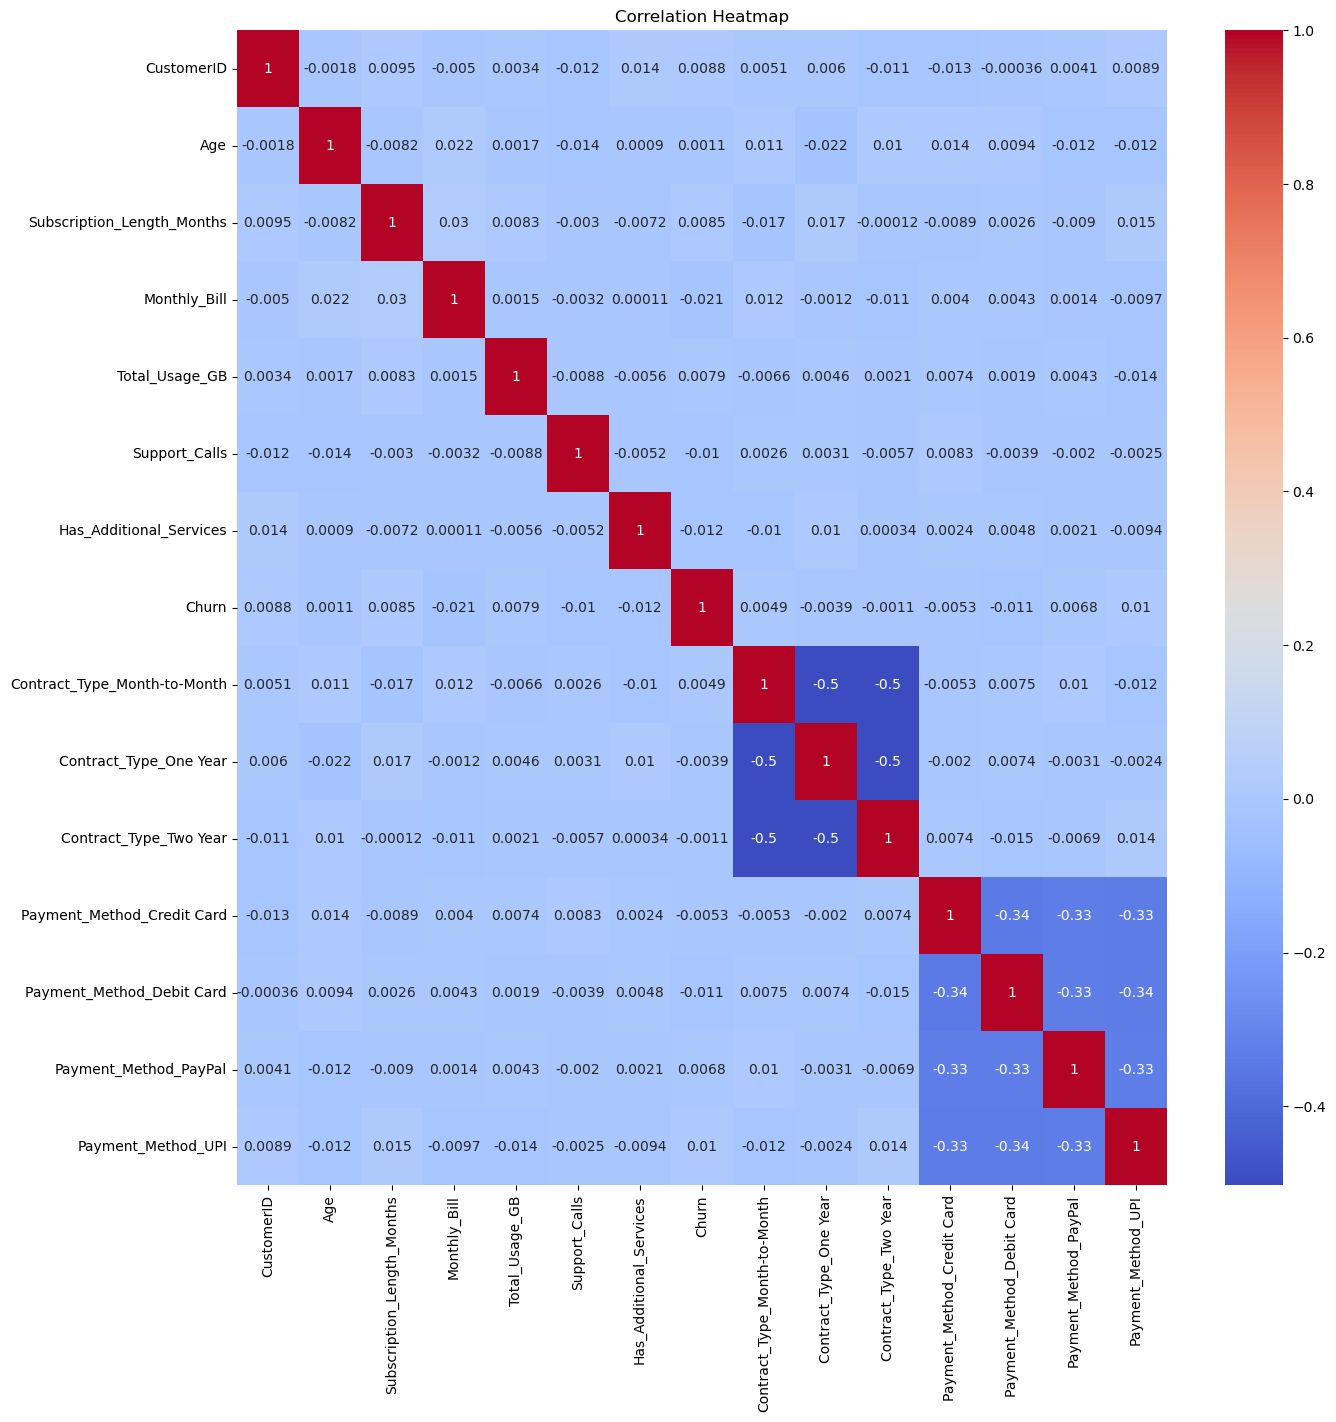

In [16]:
#Graph Correlation Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(c_r,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

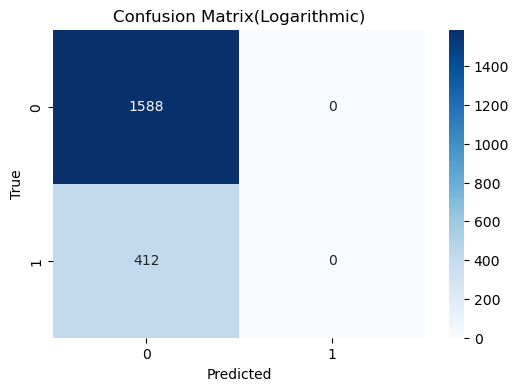

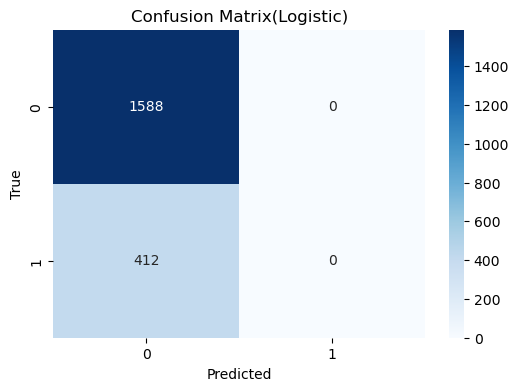

In [17]:
#12 Graphs-Logarithmic

plt.figure(figsize=(6,4))
sns.heatmap(c_m_logarithmic,annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix(Logarithmic)")
plt.show()

#12 Graphs-Logistic

plt.figure(figsize=(6,4))
sns.heatmap(c_m_logarithmic,annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix(Logistic)")
plt.show()

6252   -0.199219
4684   -0.207031
1731   -0.230469
4742   -0.207031
4521   -0.218750
          ...   
6412    0.750000
8285    0.796875
7853   -0.230469
1095    0.820312
6929   -0.246094
Name: Churn, Length: 2000, dtype: float64


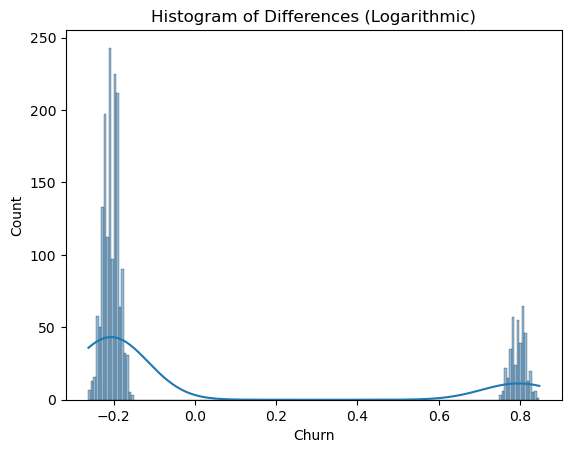

6252    0.0
4684    0.0
1731    0.0
4742    0.0
4521    0.0
       ... 
6412    1.0
8285    1.0
7853    0.0
1095    1.0
6929    0.0
Name: Churn, Length: 2000, dtype: float64


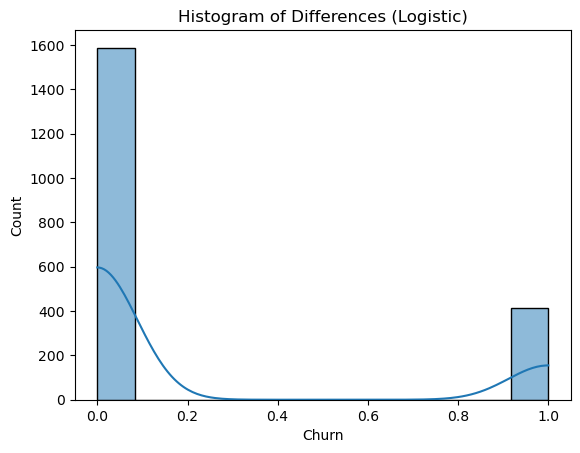

In [18]:
#Graph Histogram-logarithmic
diff_logarithmic=target_test-target_prediction_logarithmic
print(diff_logarithmic)

plt.figure()
sns.histplot(diff_logarithmic, kde=True)
plt.title("Histogram of Differences (Logarithmic)")
plt.show()

#Graph Histogram-logistic
diff_logistic=target_test-target_prediction_logistic
print(diff_logistic)

plt.figure()
sns.histplot(diff_logistic, kde=True)
plt.title("Histogram of Differences (Logistic)")
plt.show()

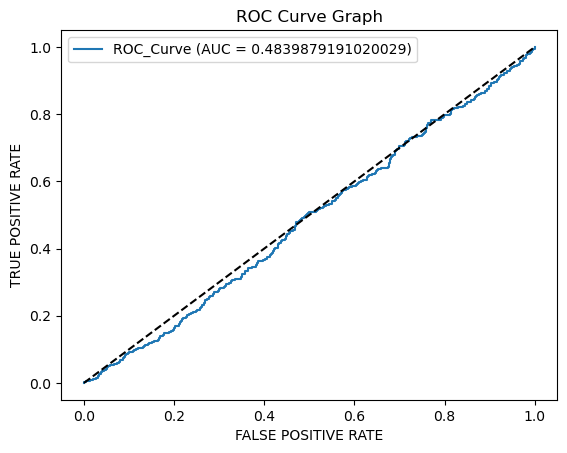

In [19]:
#12 ROC Curve Graphs-logistic
target_prediction_p= model_logistic.predict_proba(features_test)[:,1]
fpr,tpr,thresholds=roc_curve(target_test,target_prediction_p)
roc_auc=auc(fpr,tpr)

#Plotting
plt.figure()
plt.plot(fpr,tpr,label="ROC_Curve (AUC = "+str(roc_auc)+")")
plt.plot([0,1],[0,1], linestyle="dashed",color="black")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC Curve Graph")
plt.legend()
plt.show()

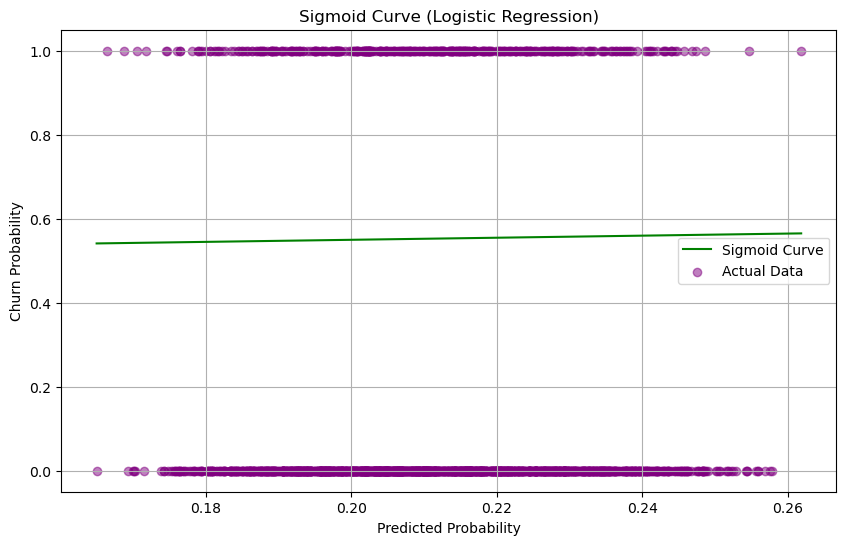

In [20]:
#Graph Sigmoid Curve for Logistic Regression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

target_prediction_p = model_logistic.predict_proba(features_test)[:, 1]

sorted_i = np.argsort(target_prediction_p)
sorted_p = target_prediction_p[sorted_i]
sorted_a = target_test.iloc[sorted_i]

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(sorted_p, sigmoid(sorted_p), color="green", label="Sigmoid Curve")
plt.scatter(sorted_p, sorted_a, color="purple", alpha=0.5, label="Actual Data")
plt.xlabel("Predicted Probability")
plt.ylabel("Churn Probability")
plt.title("Sigmoid Curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()
